In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Check for any null values
df_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### There are no missing values from the dataframe.

In [4]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### There are no missing values.
#### Next step is to convert the categorical values of sex, smoker and sex to numerical values. This can be done by creating dummy variables.

In [6]:
cols = ['sex', 'smoker', 'region']
df_ins_dummy = pd.get_dummies(df_insurance, columns = cols)
df_ins_dummy.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


### Exploratory Data Analysis

#### Understanding the realtion between the variables

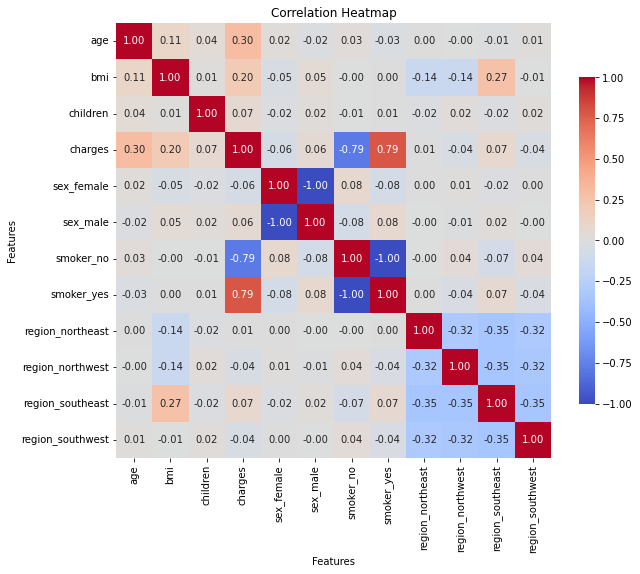

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df_ins_dummy.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

#### Observations:

The correlation matrix shows that insurance charges are predominently affected by smoking, where smoker_no are negatively correlated whereas smoker_yes is positively correlated. The next feature that affect the insurance charges are (in order) age, bmi and then region southeast.

#### Since in correlation matrix, smoking status has shown a strong relationship with insurance charges. Let's see what is the mean difference in insurance charges with smoking status.
#### 1. Smoking status vs insurance charges

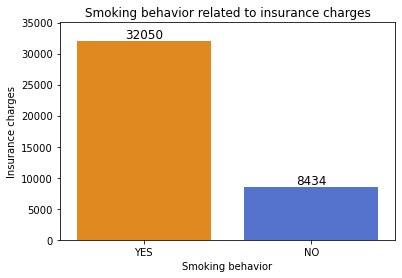

In [8]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.barplot(data=df_insurance, x='smoker', y='charges',errwidth=0)
ax.set(title = 'Smoking behavior related to insurance charges',
      xlabel = 'Smoking behavior',
      ylabel = 'Insurance charges',
      xticklabels = ['YES', 'NO'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), 
                ha='center', va='bottom', color='black', size=12)
plt.show()

#### Observations:
The plot shows that the insurance charges spiked for a smoker by about 3.8 times than a non-smoker status. Therefore, as seen in the correlation matrix, the smoking status has a huge impact on the insurance charges.

#### 2. Relation of age and insurance cost

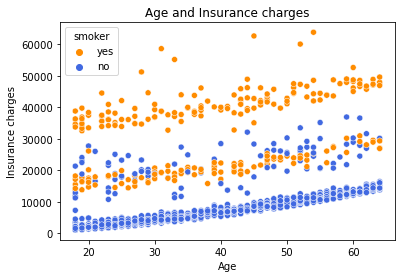

In [9]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=df_insurance, x='age', y='charges',hue='smoker')
ax.set(title='Age and Insurance charges',
      xlabel='Age',
      ylabel='Insurance charges')
plt.show()

#### Observations:
Based on above realtion, it appears that smoking status has more impact on increase in insurance charges than the age. Though there is a small increament in the insurance charges with age, a drastic difference in insurance charges can be seen for any given age group.

#### 3. Relation between number of children and insurance charges

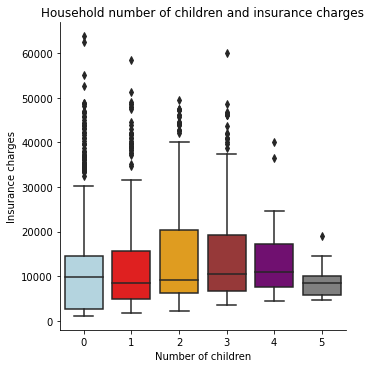

In [10]:
colors = ['lightblue','red','orange','brown','purple','grey']
g = sns.catplot(data=df_insurance, x='children', y='charges', kind='box', palette=colors)
for ax in g.axes.flat:
    ax.set(title='Household number of children and insurance charges',
          xlabel='Number of children',
          ylabel='Insurance charges')
plt.show()

#### Observations:
There seems no relationship between number of children and insurance charges, though their are plenty of outliers in the current dataset.

#### 4. Relation between BMI and insurance charges

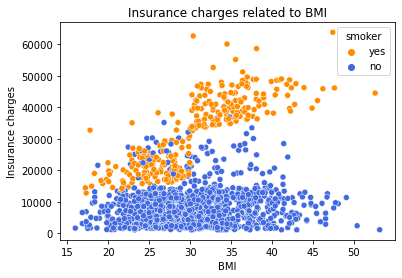

In [11]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.scatterplot(data=df_insurance, x='bmi', y='charges', hue='smoker')
ax.set(title = 'Insurance charges related to BMI',
      xlabel = 'BMI',
      ylabel = 'Insurance charges')
plt.show()

#### Observations:
There seems no realtionship between insurance charges and BMI is the smoking status is 'no'. On contrary, BMI seems an important feature if the smoking status is 'yes' and are related (probably a linear relationship) between charges and BMI.

#### 5. Insurance charges with region

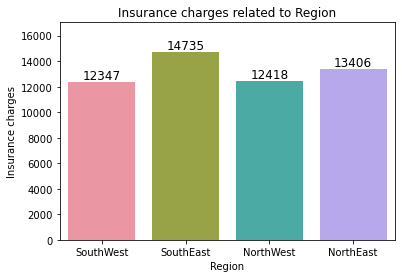

In [12]:
sns.set_palette(['darkorange', '#4169E1'])
ax = sns.barplot(data=df_insurance, x='region', y='charges', errwidth=0)
ax.set(title = 'Insurance charges related to Region',
      xlabel = 'Region',
      ylabel = 'Insurance charges',
      xticklabels = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x()+p.get_width()/2, height), 
                ha='center', va='bottom', color='black', size=12)

#### Observations:
There is a small difference in the insurance charges as per the region. Though the difference is minimal, the highest insurance charges is for the SouthEast region.

### Regression and Modeling Analysis

#### Create train and test dataset on dummy set with all features having the numeical values.

In [13]:
X = df_ins_dummy.drop(['charges'], axis=1)
y = df_ins_dummy['charges']

In [14]:
# Split 20% with test_size=0.2
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Calculating the predicting power of the model by the R2 score between predicted and real values

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score, balanced_accuracy_score

model = LinearRegression()
model.fit(X_train, y_train)
y_prediction = model.predict(X_test)

print(f'R-squared value: {r2_score(y_test, y_prediction)}')

R-squared value: 0.7999876970680435


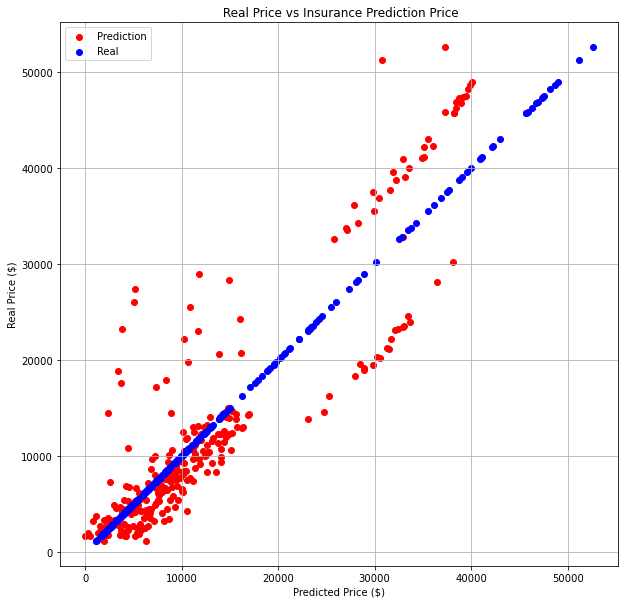

In [16]:
# Comparison Between Real Insurance Price and Prediction Price
y_pred = model.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_pred, y_test, c='red', label='Prediction')
plt.scatter(y_test, y_test, c='blue', label='Real')
plt.title(' Real Price vs Insurance Prediction Price')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Real Price ($)')
plt.grid(True)
plt.legend()
plt.show()

#### Conclusion
I have successfully built a linear regression model to predict the insurance charges based on various features such as age, bmi, sex, smoking, children and region. First the categorical variables were converted to numerical values by creating a new dataframe with dummy variables. Then the dataframe was split in train and test groups. The fitting of linear regression model by taking 'charges' column as target, achieved a reasonable level of an R-squared value of 0.799 on the test set. This means the predictions will be within 20% of the actual values as can be seen in 'Real vs Prediction' charges comparision graph. The model can be used by insurance companies to predict the charges for potential customers and to identify the key drivers of insurance charges. Further work can be done to improve the model's performance and explore other machine learning algorithms for comparison.

### Ethical Concerns and Risks:
Some of the ethical concerns and risks associated with this project includes:
1.	Privacy: One of the biggest ethical concerns is privacy. Personal data is collected for data analysis, and there is a risk that this data could be misused or shared without consent. It is essential to ensure that the data collected is anonymized and that the privacy of individuals is protected.
2.	Bias: Data analysis can be biased if the data used for analysis is not representative of the population. If the data is biased, it can lead to incorrect conclusions and unfair treatment of certain groups. It is essential to ensure that the data is representative and unbiased.
3.	Discrimination: The analysis could reveal factors that may be used to discriminate against certain groups. For example, if the analysis reveals that people with certain medical conditions have higher health insurance charges, this information could be used to discriminate against them. It is essential to ensure that the analysis does not result in discrimination against certain groups.
4.	Misuse of results: The results of the analysis could be misused for financial gain, such as charging higher premiums to certain groups or denying coverage altogether. It is important to ensure that the results of the analysis are used ethically and not to discriminate against certain groups or individuals.
5.	Informed consent: Individuals should be informed about the use of their data for analysis, and their consent should be obtained before their data is used. They should also be informed about how their data will be used and what risks are associated with the analysis.
